# Credit Score Project 💳 

## 0.0 Documentação 🗒️
>**Autor**: Millena Thalyne <br>
>**Linguagem**: Python <br>
>**Curso**: Cientista de Dados EBAC

### 0.1 Descrição 
O credit score é uma pontuação que mede a credibilidade financeira de uma pessoa com base em seu histórico de pagamentos, dívidas e uso de crédito. Ele serve para prever o risco de inadimplência e auxilia instituições financeiras a decidir sobre a concessão de crédito e definir condições de empréstimos. <br> O projeto que estou iniciando aborda esse tema, utilizando uma base de dados com informações de clientes para desenvolver um modelo preditivo capaz de estimar a probabilidade de um cliente se tornar inadimplente. <br> 
Esse notebook será separado em quatro partes: 
- **Bibliotecas e Leitura de Dados**: Bibliotecas Python utilizadas para rodar esse notebook, juntamente com a leitura da base de dados;
- **Pré-Processamento de Dados**: Realização de tratamento de nulos, tipagem e padronização de dados;
- **Análise de Dados**: Análise univariada das variáveis numéricas, análise bivariada entre duas variáveis a fim de responder algumas perguntas pertinentes nos nossos dados [3.2] e análise de correlação juntamente com a matriz de correlação dos dados em visualização "heatmap" (mapa de calor);
- **Separação de Bases de Treino e Teste**: Padronização de variáveis categóricas utilizando Label e One-Hot Encoders e separação das amostras de treino (70%) e teste (30%) para posterior utilização em modelo de Machine Learning. Além disso, também realizei o balanceamento da classe Credit Score utilizando o método de *Oversampling* SMOTE.

### 0.2 Base de Dados
*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.

## 1.0 Bibliotecas e Leitura de Dados 📋

In [1]:
# Bibliotecas utilizadas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
# Carregando o dataset
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

# Visualizando as 10 primeiras linhas do dataset
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


## 2.0 Pré-Processamento de Dados 🎲
Nessa etapa, foi desenvolvido o tratamento dos dados para nulos, tipagem e padronização. <br>
- **Nulos**: A única variável que precisou de tratamento foi a "Age" (idade), onde ela possuia 21% dos seus dados nulos. Com isso, para seu tratamento, realizei a substituição desses dados faltantes pela mediana dos dados, uma vez que a quantidade era consideravelmente alta e correria o risco de inviabilizar no resultado final;
- **Tipagem**: As variáveis que precisaram de ajustes foi a "Age" e "Income" (Idade e Renda). Para a variável de idade, precisou apenas transformar para o tipo inteiro, enquanto a de renda precisou seguir algumas etapas antes de transformar para o tipo flutuante, pois seus dados estavam registrados como caracter (exemplo, '50.000,00'). Por isso, primeiro foi necessário a exclusão das aspas simples e o ponto, e substituição da vírgula por ponto para, assim, poder realizar a transformação para tipo flutuante.
- **Padronização**: Essa etapa não foi realizada, pois não houve necessidade, uma vez que os registros estavam de acordo com o esperado.

### 2.1 Tratamento de Nulos
- Age

In [3]:
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

In [4]:
df.isnull().mean() * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\mille\AppData\Local\Temp\ipykernel_9376\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


### 2.2 Tratamento de Tipos
- Age
- Income

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [7]:
df['Age'] = df['Age'].astype('int64')

In [8]:
df['Income'] = (
    df['Income']
    .str.replace("'", "", regex=False)   # remove aspas simples
    .str.replace('.', '', regex=False)   # remove pontos de milhar
    .str.replace(',', '.', regex=False)  # troca vírgula por ponto
    .astype(float)                       # converte para float
)

### 2.3 Padronização de Dados 

In [9]:
df_caracter = df[['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']]
for col in df_caracter.columns:
    print("Coluna: {}".format(col))
    print(df_caracter[col].unique()) 

Coluna: Gender
['Female' 'Male']
Coluna: Education
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Coluna: Marital Status
['Single' 'Married']
Coluna: Home Ownership
['Rented' 'Owned']
Coluna: Credit Score
['High' 'Average' 'Low']


## 3.0 Análise de Dados 📊
Nessa etapa, foi realizado a análise das variáveis de maneira mais aprofundada, através da Análise Univariável, Bivaráda e de Correlação. 
- **Analisando Outliers**: Nessa análise, foi verificado um único ponto discrepante na variável Number of Children (número de filhos), porém não foi necessário tratamento, uma vez que não representa um erro, apenas um registro divergente dos demais;
- **Análise Univariada**: Essa análise foi realizada nas variáveis numéricas Age, Income e Number of Children:
  - Number of Children: A partir da análise, foi notado que a maior concentração de clientes não possue filhos (59%), seguido por 1-2 filhos (19-18%) e 3 filhos (3%);
  - Age: Após essa análise, foi concluído que a maior concentração de clientes é entre 30-39 anos (51%), seguido pelas idades entre 40-49 (23%), 20-29 (19%) e 50+ (9%);
  - Income: A partir da análise, essa variável se mostrou bastante equilibrada e com um pico de registros na renda de R$80.000 e R$100.000, com média e mediana de aproximadamente R$84.000.
- **Análise Bivariana**: Essa análise foi separada em algumas questões pertinentes na nossa base de dados, sendo elas respondidas, como:
  * Existe relação entre a idade e o status civil? - Sim, existe uma maior concentração de clientes *casados*, principalmente a partir dos 45 anos e tendo um pico aos 36 anos (23 pessoas);
  * Qual a relação entre o score de crédito e o nível de escolaridade? - Existe uma concentração muito grande de pessoas com um Score de crédito alto nos níveis escolares Bacharel, Mestrando e Doutor, com foco nos mestres (36 pessoas);
  * O salário parece influenciar na idade? - Sim, de acordo com a análise, é uma relação forte, onde, conforme a idade aumenta, o salário tende a aumentar;
  * O salário parece influenciar no Score de Crédito? - Sim, conforme o salário é maior, mais pessoas tendem a ter Score de crédito alto; 
  * Clientes com casa própria tendem a ter um score mais alto? - Sim, a concentração de pessoas com casa própria que possuem Score de crédito alto é muito maior que as que não possuem; 
  * O número de filhos influencia no score de crédito? - Aparentemente não, pois independente do número de filhos, pode-se encontrar diversas pessoas com Score de crédito alto. Porém, a concentração maior está naqueles que não possuem filhos (talvez por ser a classe com maior número de registros);
  * O número de filhos influencia no salário? - De acordo com a análise, não. Essas variáveis não possuem uma relação forte;
  * A educação tem relação no aumento do salário? - Sim, conforme o nível escolar aumenta, maior o salário. Tendo uma distribuição equilibrada para as pessoas com somente o ensino médio e o pico dos maiores salário em quem possue mestrado.
* **Análise de Correlação**: A *primeira* matriz de correlação mostrou que as relações mais fortes são entre as variáveis:
  * Credit Score ↔ Casa Própria: p = 0.855 
  * Renda ↔ Credit Score: p = 0.744 
  * Estado Civil ↔ Casa Própria: p = 0.708 
  * Renda ↔ Casa Própria: p = 0.705 <br>
Já na *segunda* matriz de correlação (após a realização do tratamento utilizando Label e One-Hot Encoders), tivemos as relações mais fortes entre:
  * Solteiro ↔ Alugada: p = 0.708 
  * Renda ↔ Alugada: p = -0.705 

### 3.1 Análise Univariada - Variáveis Numéricas
* Age
* Income
* Number of Children

In [10]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


#### 3.1.1 Analisando Outliers

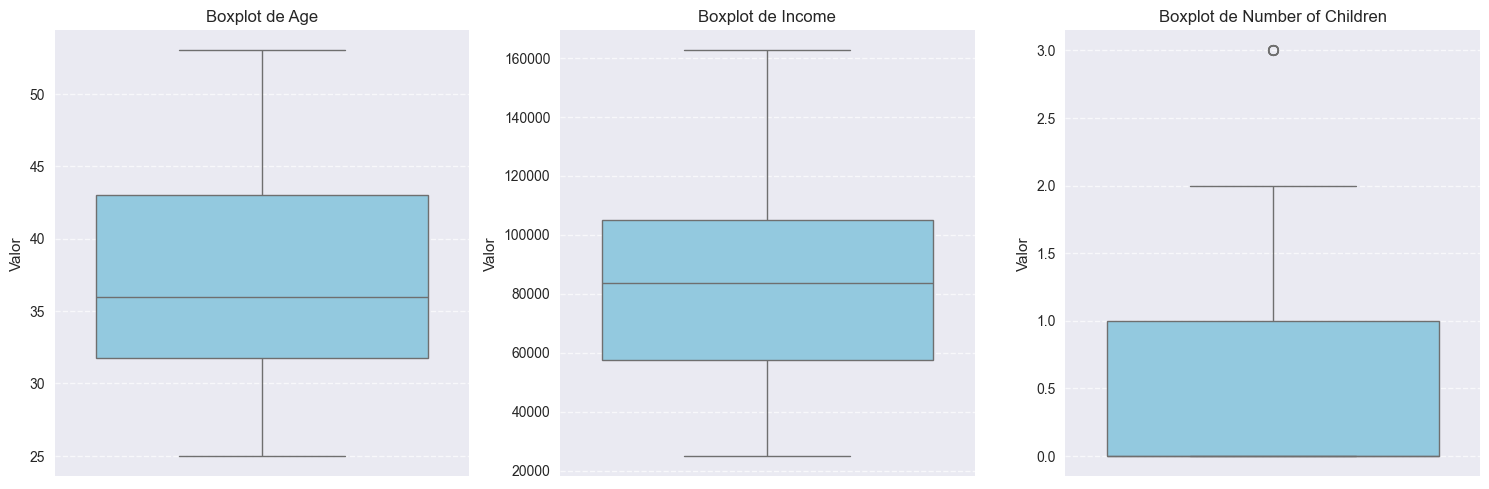

In [51]:
# Definindo colunas numéricas
numericos = ['Age', 'Income', 'Number of Children']

# Criar figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre colunas e eixos
for ax, col in zip(axes, numericos):
    sns.boxplot(y=df[col], ax=ax, color="skyblue")
    ax.set_title(f'Boxplot de {col}', fontsize=12)
    ax.set_ylabel("Valor")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

#### 3.1.2 Variável de Número de Filhos

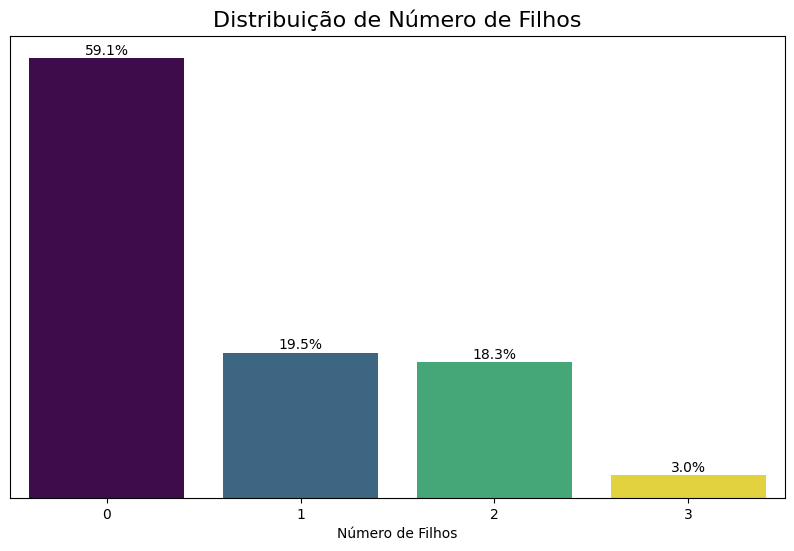

In [12]:
# Gráfico de barras para a contagem de número de filhos
contagem = df['Number of Children'].value_counts().sort_index()

# Gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem.index, y=contagem.values, hue=contagem.index, palette='viridis', legend=False)
plt.title('Distribuição de Número de Filhos', fontsize=16)
plt.xlabel('Número de Filhos')  
plt.yticks([])

# Adicionando porcentagens acima das barras
for i, val in enumerate(contagem.values):
    pct = (val / contagem.sum()) * 100
    plt.text(i, val + 0.05, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

#### 3.1.3 Variável Idades

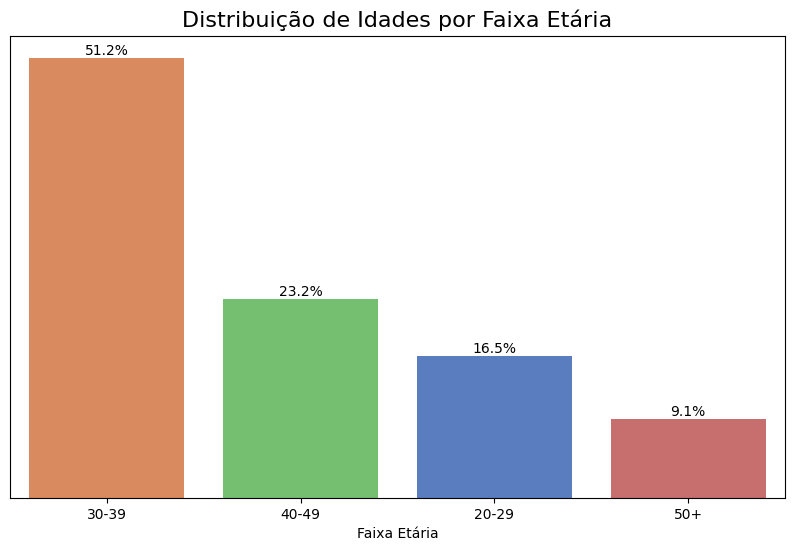

In [13]:
# Criado faixas etárias
idades = [20, 30, 40, 50, df['Age'].max()+1]
labels = ['20-29', '30-39', '40-49', '50+']
age_group = pd.cut(df['Age'], bins=idades, labels=labels, right=False)
age_counts = age_group.value_counts().sort_values(ascending=False)

# Gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index, palette='muted', order=age_counts.index, legend=False)
plt.title('Distribuição de Idades por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária')
plt.ylabel('')
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando porcentagem acima das barras
for i, val in enumerate(age_counts.values):
    pct = (val / age_counts.sum()) * 100
    plt.text(i, val + 0.05, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

#### 3.1.4 Variável Income

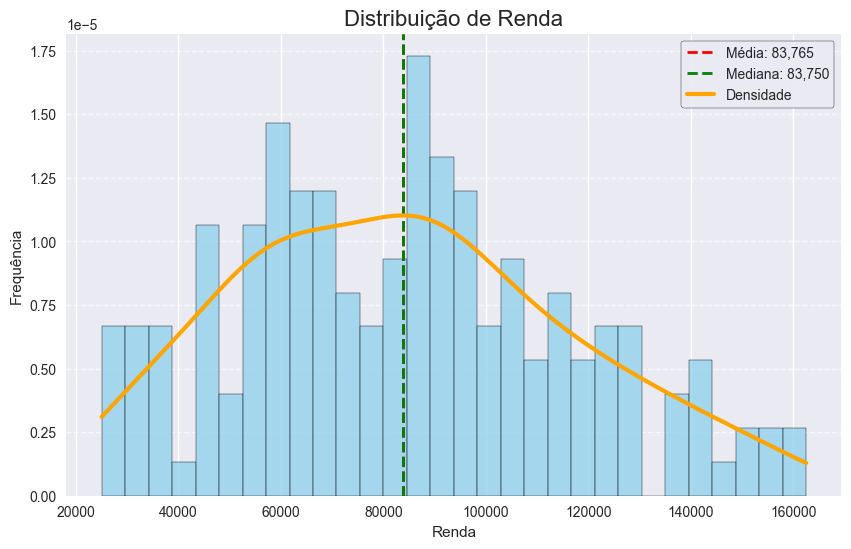

In [14]:
# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Histograma da variável Income
plt.figure(figsize=(10, 6))

# Histograma + KDE do seaborn
sns.histplot(df['Income'], bins=30, alpha=0.7, kde=False, color='skyblue', edgecolor='black', stat="density")

# Linhas de média e mediana
plt.axvline(df['Income'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["Income"].mean():,.0f}')
plt.axvline(df['Income'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["Income"].median():,.0f}')

# Curva de densidade manual
x_range = np.linspace(df['Income'].min(), df['Income'].max(), 200)
density = stats.gaussian_kde(df['Income'])
plt.plot(x_range, density(x_range), color='orange', linewidth=3, label='Densidade')

# Configurações do gráfico
plt.title('Distribuição de Renda', fontsize=16)
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper right', frameon=True, framealpha=0.9, edgecolor='black')

# Exibir o gráfico
plt.show()

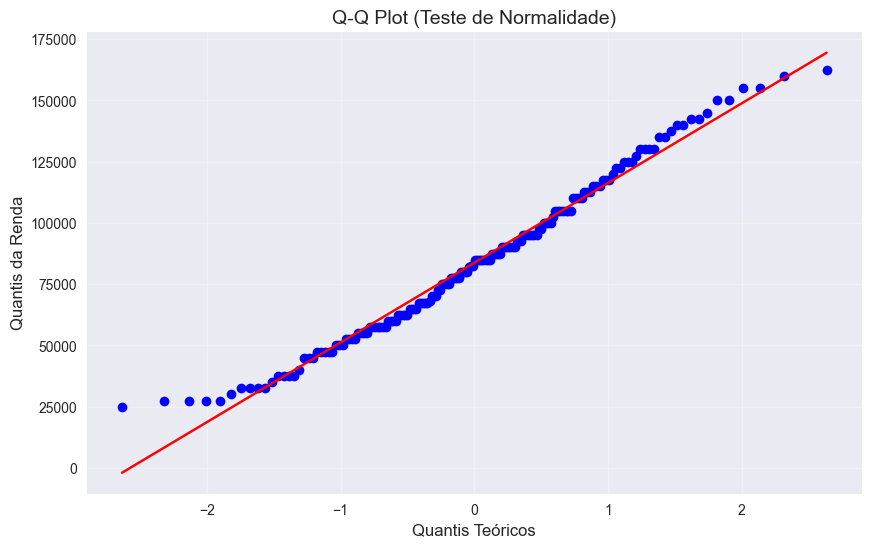

In [15]:
# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

plt.figure(figsize=(10, 6))

# Q-Q Plot (com plot=plt para desenhar)
stats.probplot(df['Income'], dist="norm", plot=plt)

plt.title('Q-Q Plot (Teste de Normalidade)', fontsize=14)
plt.xlabel('Quantis Teóricos', fontsize=12)
plt.ylabel('Quantis da Renda', fontsize=12)
plt.grid(True, alpha=0.3)

# Exibir o gráfico
plt.show()

### 3.2 Análise Bivariada
* Existe relação entre a idade e o status civil?
* Qual a relação entre o score de crédito e o nível de escolaridade?
* O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?
* O número de filhos influencia no score de crédito? 
* O número de filhos influencia no salário? 
* A educação tem relação no aumento do salário?

#### 3.2.1 Idade e Estado Civil

In [16]:
fig = px.histogram(df, x='Age', color='Marital Status', barmode='group', nbins=30)

fig.update_layout(
    title='Distribuição de Idades por Estado Civil',
    xaxis_title='Idade',
    yaxis_title='Estado Civil',
    legend_title='Estado Civil',
)

fig.show()

In [17]:
fig = px.box(df,
    x='Marital Status',
    y='Age',
    title='Boxplot de Idade por Status Civil',
    labels={'Marital Status': 'Estado Civil', 'Age': 'Idade'},
    color='Marital Status',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title={
        'text': 'Distribuição de Idades por Estado Civil',
        'x': 0.5,  # Centraliza o título
        'xanchor': 'center',
        'font': {'size': 18}
    },
    xaxis_title='Estado Civil',
    yaxis_title='Idade',
    font=dict(size=13),
    plot_bgcolor='white',
    width=800,
    height=600,
    showlegend=False
)

fig.update_traces(
    boxpoints='outliers',
    hovertemplate='<b>%{x}</b><br>Idade: %{y}<extra></extra>'
)

fig.show()

# Estatísticas descritivas por grupo
print("\nEstatísticas descritivas por Estado Civil:")
print(df.groupby('Marital Status')['Age'].describe().round(1))


Estatísticas descritivas por Estado Civil:
                count  mean  std   min   25%   50%   75%   max
Marital Status                                                
Married          87.0  40.4  7.4  26.0  36.0  37.0  48.0  53.0
Single           77.0  33.6  6.0  25.0  28.0  33.0  36.0  44.0


#### 3.2.2 Credit Score e Education

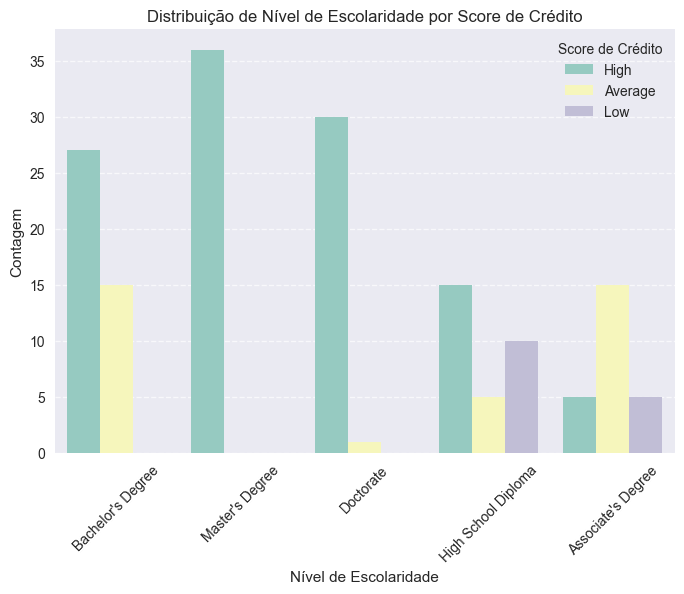

In [18]:
sns.countplot(data=df, x='Education', hue='Credit Score', palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribuição de Nível de Escolaridade por Score de Crédito')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Score de Crédito')
plt.show()

In [19]:
# Criando o gráfico de barras com Plotly Express
fig = px.histogram(
    df,
    x='Education',
    color='Credit Score',
    barmode='relative',
    histnorm='percent',
    title='Distribuição de Nível de Escolaridade por Score de Crédito (Percentual)',
    labels={'Education': 'Nível de Escolaridade', 'Credit Score': 'Score de Crédito', 'percent': 'Percentual'},
    color_discrete_sequence=["#ff7f0e","#1f77b4", "#2ca02c"]
)

# Atualizando o layout do gráfico
fig.update_layout(
    xaxis_title='Nível de Escolaridade',
    yaxis_title='Percentual (%)',
    legend_title='Score de Crédito',
    bargap=0.2,
)

# Exibindo o gráfico
fig.show()

In [20]:
# Criando o gráfico de barras com Plotly Express
fig = px.histogram(
    df,
    x='Education',
    color='Credit Score',
    barmode='group',
    title='Distribuição de Nível de Escolaridade por Score de Crédito (Contagem)',
    labels={'Education': 'Nível de Escolaridade', 'Credit Score': 'Score de Crédito', 'count': 'Contagem'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Atualizando o layout do gráfico
fig.update_layout(
    xaxis_title='Nível de Escolaridade',
    yaxis_title='Contagem',
    legend_title='Score de Crédito',
    bargap=0.2
)

# Exibindo o gráfico
fig.show()

#### 3.2.3 Income e Age

In [21]:
# Criar o scatterplot
fig = px.scatter(df, 
                 x='Age', 
                 y='Income',
                 title='Relação entre Idade e Salário',
                 labels={'Age': 'Idade', 'Income': 'Salário'},
                 opacity=0.7,
                 color_discrete_sequence=['#2E86AB'])

# Calcular linha de tendência
z = np.polyfit(df['Age'], df['Income'], 1)
p = np.poly1d(z)

# Adicionar linha de tendência
fig.add_scatter(x=df['Age'], 
                y=p(df['Age']),
                mode='lines',
                name='Linha de Tendência',
                line=dict(color='red', width=2))

# Calcular correlação
correlation, p_value = pearsonr(df['Age'], df['Income'])

# Personalizar layout
fig.update_layout(
    title={
        'text': f'Relação entre Idade e Salário<br><sub>Correlação: {correlation:.3f}</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Idade (anos)',
    yaxis_title='Salário (R$)',
    width=800,
    height=600,
    plot_bgcolor='white',
    hovermode='closest'
)

# Adicionar grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Personalizar hover
fig.update_traces(
    hovertemplate='<b>Idade:</b> %{x} anos<br><b>Salário:</b> %{y}<extra></extra>',
    selector=dict(mode='markers')
)

fig.show()

In [22]:
# Estatísticas
print(f"Correlação de Pearson: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Interpretação da correlação:")
if abs(correlation) < 0.1:
    print("- Correlação muito fraca ou inexistente")
elif abs(correlation) < 0.3:
    print("- Correlação fraca")
elif abs(correlation) < 0.5:
    print("- Correlação moderada")
elif abs(correlation) < 0.7:
    print("- Correlação forte")
else:
    print("- Correlação muito forte")

if correlation > 0:
    print("- Relação positiva: conforme a idade aumenta, o salário tende a aumentar")
elif correlation < 0:
    print("- Relação negativa: conforme a idade aumenta, o salário tende a diminuir")
else:
    print("- Não há relação linear clara entre as variáveis")

Correlação de Pearson: 0.6215
P-value: 0.0000
Interpretação da correlação:
- Correlação forte
- Relação positiva: conforme a idade aumenta, o salário tende a aumentar


#### 3.2.4 Income e Credit Score

In [23]:
fig1 = px.box(df,
    x='Credit Score',
    y='Income',
    title='Boxplot de Renda por Score de Crédito',
    labels={'Credit Score': 'Score de Crédito', 'Income': 'Salário'},
    color='Credit Score',
    color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#45B7D1']
)

fig1.update_layout(
    title={
        'text': 'Distribuição de Renda por Score de Crédito',
        'x': 0.5,  # Centraliza o título
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Score de Crédito',
    yaxis_title='Salário (R$)',
    width=800,
    height=500,
    plot_bgcolor='white',
    showlegend=False
)

fig1.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray'
)

fig1.show()

In [24]:
# Estatísticas descritivas por grupo
print("Estatísticas de Salário por Credit Score:")
stats = df.groupby('Credit Score')['Income'].agg(['count', 'mean', 'median', 'std']).round(2)
print(stats)

Estatísticas de Salário por Credit Score:
              count      mean   median       std
Credit Score                                    
Average          36  55500.00  55000.0   7923.74
High            113  99641.59  95000.0  25322.16
Low              15  32000.00  32500.0   4350.70


#### 3.2.5 Home Ownership e Credit Score

In [25]:
# Criar tabela de contingência
contingency_table = pd.crosstab(df['Home Ownership'], df['Credit Score'])

# Criar gráfico de barras empilhadas
fig = px.bar(
    contingency_table.reset_index().melt(id_vars=['Home Ownership']),
    x='Home Ownership',
    y='value',
    color='Credit Score',
    title='Distribuição de Credit Score por Tipo de Moradia',
    labels={'Home Ownership': 'Tipo de Moradia', 'value': 'Quantidade'},
    color_discrete_sequence=["#65D1CA","#DF5A5A", "#29CAEE"],
    barmode='group'
)

# Atualizar layout do gráfico
fig.update_layout(
    title={
        'text': 'Distribuição de Credit Score por Tipo de Moradia',
        'x': 0.5,  # Centraliza o título
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Tipo de Moradia',
    yaxis_title='Quantidade',
    width=800,
    height=600,
    plot_bgcolor='white',
)

# Adicionar grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Mostrar o gráfico
fig.show()

In [26]:
# Estatísticas descritivas
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("Tabela de Contingência (Contagens):")
print(contingency_table)
print("\nProporções por Tipo de Moradia (%):")
print(proportions.round(1))

Tabela de Contingência (Contagens):
Credit Score    Average  High  Low
Home Ownership                    
Owned                 2   109    0
Rented               34     4   15

Proporções por Tipo de Moradia (%):
Credit Score    Average  High   Low
Home Ownership                     
Owned               1.8  98.2   0.0
Rented             64.2   7.5  28.3


#### 3.2.6 Number of Children e Credit Score

In [27]:
contingency_table_NB = pd.crosstab(df['Number of Children'], df['Credit Score'])
contingency_table_NB = contingency_table_NB.reindex(columns=['Low', 'Medium', 'High'], fill_value=0)

df_melted = contingency_table_NB.reset_index().melt(
    id_vars=['Number of Children'],
    var_name='Credit Score',
    value_name='Quantidade'
)

# Criar gráfico de barras agrupadas
fig = px.bar(df_melted, 
             x='Number of Children', 
             y='Quantidade',
             color='Credit Score',
             title='Distribuição de Credit Score por Número de Filhos',
             labels={'Number of Children': 'Número de Filhos', 'Quantidade': 'Quantidade de Pessoas'},
             color_discrete_sequence=['#45B7D1', '#4ECDC4', '#FF6B6B'],
             barmode='group')

# Personalizar layout
fig.update_layout(
    title={
        'text': 'Distribuição de Credit Score por Número de Filhos',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Número de Filhos',
    yaxis_title='Quantidade de Pessoas',
    width=900,
    height=600,
    plot_bgcolor='white',
    xaxis=dict(type='category')  # Tratar como categorias para melhor visualização
)

# Adicionar grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_xaxes(showgrid=False)

# Personalizar hover
fig.update_traces(
    hovertemplate='<b>Filhos:</b> %{x}<br><b>Credit Score:</b> %{fullData.name}<br><b>Quantidade:</b> %{y}<extra></extra>'
)

fig.show()


In [28]:
# Criar tabela de contingência (invertida para o novo layout)
contingency_table_NB = pd.crosstab(df['Credit Score'], df['Number of Children'])

# Preparar dados para o gráfico com eixos invertidos
df_melted = contingency_table_NB.reset_index().melt(
    id_vars=['Credit Score'],
    var_name='Number of Children',
    value_name='Quantidade'
)

# Definir ordem lógica do Credit Score
credit_order = ['Low', 'Medium', 'High']
df_melted['Credit Score'] = pd.Categorical(df_melted['Credit Score'], categories=credit_order, ordered=True)

# Criar gráfico de barras agrupadas com eixos invertidos
fig = px.bar(df_melted, 
             x='Credit Score',  # Agora Credit Score está no eixo X
             y='Quantidade',
             color='Number of Children',  # Number of Children agora é a variável de cor
             title='Distribuição do Número de Filhos por Credit Score',
             labels={'Credit Score': 'Credit Score', 'Quantidade': 'Quantidade de Pessoas', 'Number of Children': 'Número de Filhos'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             barmode='group',
             category_orders={'Credit Score': credit_order})

# Personalizar layout
fig.update_layout(
    title={
        'text': 'Distribuição do Número de Filhos por Credit Score',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Credit Score',
    yaxis_title='Quantidade de Pessoas',
    width=900,
    height=600,
    plot_bgcolor='white'
)

# Adicionar grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_xaxes(showgrid=False)

# Personalizar hover
fig.update_traces(
    hovertemplate='<b>Credit Score:</b> %{x}<br><b>Filhos:</b> %{fullData.name}<br><b>Quantidade:</b> %{y}<extra></extra>'
)

fig.show()

#### 3.2.7 Number of Children e Income

In [29]:
fig = px.scatter(df,
    x='Number of Children',
    y='Income',
    title='Relação entre Número de Filhos e Renda',
    labels={'Number of Children': 'Número de Filhos', 'Income': 'Renda (R$)'},
    opacity=0.6,
    color_discrete_sequence=['#FFA600']
)

# Calcular linha de tendência
z = np.polyfit(df['Number of Children'], df['Income'], 1)
p = np.poly1d(z)

# Pontos para a linha de tendência
x_line = np.linspace(df['Number of Children'].min(), df['Number of Children'].max(), 100)
y_line = p(x_line)

# Adicionar linha de tendência
fig.add_scatter(x=x_line,
                y=y_line,
                mode='lines',
                name='Linha de Tendência',
                line=dict(color='red', width=3))

# Calcular correlação
correlation2, p_value2 = pearsonr(df['Number of Children'], df['Income'])

# Personalizar layout
fig.update_layout(
    title={
        'text': f'Relação entre Número de Filhos e Renda<br><sub>Correlação de Pearson: {correlation2:.3f}</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Número de Filhos',
    yaxis_title='Renda (R$)',
    width=900,
    height=600,
    plot_bgcolor='white',
    hovermode='closest'
)

# Personalizar eixos
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', tickmode='linear', dtick=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Personalizar hover
fig.update_traces(
    hovertemplate='<b>Filhos:</b> %{customdata}<br><b>Renda:</b> %{y:,.0f}<extra></extra>',
    customdata=df['Number of Children'],
    selector=dict(mode='markers')
)

# Exibir gráfico
fig.show()

In [30]:
# Estatísticas detalhadas
print(f"Análise de Correlação:")
print(f"Correlação de Pearson: {correlation2:.4f}")
print(f"P-value: {p_value2:.4f}")

Análise de Correlação:
Correlação de Pearson: 0.0845
P-value: 0.2818


In [31]:
# Interpretação da correlação
if abs(correlation2) < 0.1:
    interpretation = "muito fraca ou inexistente"
elif abs(correlation2) < 0.3:
    interpretation = "fraca"
elif abs(correlation2) < 0.5:
    interpretation = "moderada"
elif abs(correlation2) < 0.7:
    interpretation = "forte"
else:
    interpretation = "muito forte"

direction = "positiva" if correlation2 > 0 else "negativa" if correlation2 < 0 else "inexistente"
print(f"Interpretação: Correlação {interpretation} e {direction}")

if correlation2 > 0:
    print("- Tendência: conforme o número de filhos aumenta, a renda tende a aumentar")
elif correlation2 < 0:
    print("- Tendência: conforme o número de filhos aumenta, a renda tende a diminuir")
else:
    print("- Não há tendência linear clara entre as variáveis")

print(f"Significância estatística: {'Sim' if p_value2 < 0.05 else 'Não'}")

Interpretação: Correlação muito fraca ou inexistente e positiva
- Tendência: conforme o número de filhos aumenta, a renda tende a aumentar
Significância estatística: Não


#### 3.2.8 Education e Income

In [32]:
# Criar o boxplot
fig = px.box(df,
    x='Education',
    y='Income',
    title='Boxplot de Renda por Nível de Escolaridade',
    labels={'Education': 'Nível de Escolaridade', 'Income': 'Renda (R$)'},
    color='Education',
    color_discrete_sequence=px.colors.qualitative.Set2_r,
    category_orders={'Education': ['High School', 'Bachelor', 'Master', 'PhD']})

# Adicionar pontos de dados individuais
fig.update_traces(
    boxpoints='outliers',
    hovertemplate='<b>Educação:</b> %{x}<br><b>Renda:</b> %{y:,.0f}<extra></extra>',
)

# Personalizar layout
fig.update_layout(
    title={
        'text': 'Distribuição de Renda por Nível de Escolaridade',
        'x': 0.5,  # Centraliza o título
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Nível de Escolaridade',
    yaxis_title='Renda (R$)',
    width=1000,
    height=600,
    plot_bgcolor='white',
    showlegend=False,
    xaxis_tickangle=-45
)

# Adicionar grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_xaxes(showgrid=False)

# Exibir o gráfico
fig.show()

In [33]:
education_mapping = {
    'High School Diploma': 1,
    "Associate's Degree": 2,
    "Bachelor's Degree": 3,
    "Master's Degree": 4,
    'Doctorate': 5
}

df_temp = df.copy()
df_temp['Education_Numeric'] = df_temp['Education'].map(education_mapping)

# Remover valores NaN caso algum nível não exista
df_temp = df_temp.dropna(subset=['Education_Numeric'])

if len(df_temp) > 0:
    correlation, p_val_corr = spearmanr(df_temp['Education_Numeric'], df_temp['Income'])
    print(f"\nCorrelação de Spearman: {correlation:.4f}")
    print(f"P-value da correlação: {p_val_corr:.4f}")

    # Interpretação da correlação
    if abs(correlation) < 0.1:
        interpretation = "muito fraca"
    elif abs(correlation) < 0.3:
        interpretation = "fraca"
    elif abs(correlation) < 0.5:
        interpretation = "moderada"
    elif abs(correlation) < 0.7:
        interpretation = "forte"
    else:
        interpretation = "muito forte"

    direction = "positiva" if correlation > 0 else "negativa" if correlation < 0 else "inexistente"
    print(f"Interpretação: Correlação {interpretation} e {direction}")


Correlação de Spearman: 0.3086
P-value da correlação: 0.0001
Interpretação: Correlação moderada e positiva


### 3.3 Análise de Correlação

#### 3.3.1 Transformando Variáveis Categóricas

In [34]:
education_mapping = {
    'High School Diploma': 1,
    "Associate's Degree": 2,
    "Bachelor's Degree": 3,
    "Master's Degree": 4,
    'Doctorate': 5
}

credit_mapping = {
    'Low': 1,
    'Average': 2,
    'High': 3
}

marital_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2  
}

gender_mapping = {
    'Female': 0,
    'Male': 1
}

home_mapping = {
    'Rented': 0,
    'Owned': 1
}

In [35]:
df_corr = df.copy()

# Aplicar as transformações
df_corr['Education_Numeric'] = df_corr['Education'].map(education_mapping)
df_corr['Credit_Score_Numeric'] = df_corr['Credit Score'].map(credit_mapping)
df_corr['Marital_Status_Numeric'] = df_corr['Marital Status'].map(marital_mapping)
df_corr['Gender_Numeric'] = df_corr['Gender'].map(gender_mapping)
df_corr['Home_Ownership_Numeric'] = df_corr['Home Ownership'].map(home_mapping)

#### 3.3.2 Matriz de Correlação

In [36]:
# Selecionar apenas as colunas numéricas para a matriz de correlação
numeric_vars = [
    'Age', 'Income', 'Number of Children',
    'Education_Numeric', 'Credit_Score_Numeric', 
    'Marital_Status_Numeric', 'Gender_Numeric', 'Home_Ownership_Numeric'
]

# Matriz de correlação
correlation_matrix = df_corr[numeric_vars].corr()

# Renomear colunas/índices para melhor visualização
correlation_matrix.index = ['Idade', 'Renda', 'Nº Filhos', 'Educação', 'Credit Score', 'Estado Civil', 'Gênero', 'Casa Própria']
correlation_matrix.columns = ['Idade', 'Renda', 'Nº Filhos', 'Educação', 'Credit Score', 'Estado Civil', 'Gênero', 'Casa Própria']

In [37]:
# Criar heatmap de correlação
fig = px.imshow(correlation_matrix,
                labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale='RdBu_r',
                aspect="auto",
                title='Matriz de Correlação entre Variáveis')

# Adicionar valores de correlação nas células
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(x=j, y=i,
                          text=f'{correlation_matrix.iloc[i, j]:.3f}',
                          showarrow=False,
                          font=dict(
                              color="white" if abs(correlation_matrix.iloc[i, j]) > 0.5 else "black",
                              size=11
                          ))

# Personalizar layout
fig.update_layout(
    title={
        'text': 'Matriz de Correlação entre Variáveis',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    width=800,
    height=700,
    xaxis_tickangle=45
)

# Ajustar escala de cores para destacar correlações fortes
fig.update_coloraxes(
    colorbar_title="Correlação",
    cmin=-1, 
    cmax=1
)

# Exibir o gráfico
fig.show()

In [38]:
print("Correlação entre variáveis:")

correlations_list = []
for i in range(len(correlation_matrix.index)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        correlations_list.append({
            'Variavel_1': correlation_matrix.index[i],
            'Variavel_2': correlation_matrix.columns[j],
            'Correlacao': corr_value
        })

# Ordenar por valor absoluto da correlação
correlations_list.sort(key=lambda x: abs(x['Correlacao']), reverse=True)

# Listas separadas
fracas = [c for c in correlations_list if 0.1 < abs(c['Correlacao']) <= 0.3]
moderadas = [c for c in correlations_list if 0.3 < abs(c['Correlacao']) <= 0.7]
fortes = [c for c in correlations_list if abs(c['Correlacao']) > 0.7]

def imprimir(lista, titulo, tipo):
    print(f"\n{titulo}:")
    if lista:
        for corr in lista:
            direction = "positiva" if corr['Correlacao'] > 0 else "negativa"
            print(f"  {corr['Variavel_1']} ↔ {corr['Variavel_2']}: {corr['Correlacao']:.3f} ({direction}, {tipo})")
    else:
        print("  Nenhuma encontrada.")

imprimir(fracas, "Correlações fracas (0.1 < |r| ≤ 0.3)", "fraca")
imprimir(moderadas, "Correlações moderadas (0.3 < |r| ≤ 0.7)", "moderada")
imprimir(fortes, "Correlações fortes (|r| > 0.7)", "forte")


Correlação entre variáveis:

Correlações fracas (0.1 < |r| ≤ 0.3):
  Estado Civil ↔ Gênero: -0.278 (negativa, fraca)
  Renda ↔ Educação: 0.254 (positiva, fraca)
  Idade ↔ Gênero: 0.205 (positiva, fraca)
  Credit Score ↔ Gênero: 0.195 (positiva, fraca)
  Idade ↔ Educação: 0.181 (positiva, fraca)

Correlações moderadas (0.3 < |r| ≤ 0.7):
  Nº Filhos ↔ Estado Civil: 0.697 (positiva, moderada)
  Idade ↔ Casa Própria: 0.628 (positiva, moderada)
  Idade ↔ Renda: 0.621 (positiva, moderada)
  Credit Score ↔ Estado Civil: 0.620 (positiva, moderada)
  Idade ↔ Credit Score: 0.572 (positiva, moderada)
  Educação ↔ Credit Score: 0.538 (positiva, moderada)
  Nº Filhos ↔ Casa Própria: 0.497 (positiva, moderada)
  Renda ↔ Gênero: 0.496 (positiva, moderada)
  Educação ↔ Casa Própria: 0.490 (positiva, moderada)
  Renda ↔ Estado Civil: 0.471 (positiva, moderada)
  Idade ↔ Estado Civil: 0.449 (positiva, moderada)
  Nº Filhos ↔ Gênero: -0.442 (negativa, moderada)
  Nº Filhos ↔ Credit Score: 0.426 (positiva

#### 3.3.3 Tratamento com Label Encoder/One Hot

* **Label Encoder**: Education, Credit Score
* **One Hot Encoder**: Marital Status, Gender, Home Ownership

In [39]:
# Instanciar os codificadores de rótulos
le = LabelEncoder()

# Criar uma cópia do DataFrame original para codificação
df_encoded = df.copy()

# Aplicar Label Encoding
df_encoded['Education'] = le.fit_transform(df_encoded['Education'])
df_encoded['Credit Score'] = le.fit_transform(df_encoded['Credit Score'])


df_encoded = pd.get_dummies(
    df_encoded, 
    columns=['Marital Status', 'Gender', 'Home Ownership'], 
    drop_first=True, 
    prefix=['Marital','Gender', 'Home']
)


for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Exibir as primeiras linhas do DataFrame codificado
df_encoded.head()

,Age,Income,Education,Number of Children,Credit Score,Marital_Single,Gender_Male,Home_Rented
0,25,50000.0,1,0,1,1,0,1
1,30,100000.0,4,2,1,0,1,0
2,35,75000.0,2,1,1,0,0,0
3,40,125000.0,3,0,1,1,1,0
4,45,100000.0,1,3,1,0,0,0


In [40]:
df_encoded.corr()

,Age,Income,Education,Number of Children,Credit Score,Marital_Single,Gender_Male,Home_Rented
Age,1.000000,0.621492,0.171525,0.072432,0.218494,-0.449115,0.204661,-0.628042
Income,0.621492,1.000000,0.369449,0.084547,0.083698,-0.471004,0.495738,-0.704928
Education,0.171525,0.369449,1.000000,0.047311,0.334424,-0.067797,0.248671,-0.397043
Number of Children,0.072432,0.084547,0.047311,1.000000,0.136517,-0.696984,-0.442139,-0.497129
Credit Score,0.218494,0.083698,0.334424,0.136517,1.000000,-0.205756,-0.247729,-0.293384
Marital_Single,-0.449115,-0.471004,-0.067797,-0.696984,-0.205756,1.000000,0.278362,0.708374
Gender_Male,0.204661,0.495738,0.248671,-0.442139,-0.247729,0.278362,1.000000,-0.031519
Home_Rented,-0.628042,-0.704928,-0.397043,-0.497129,-0.293384,0.708374,-0.031519,1.000000


In [41]:
# Selecionar apenas as colunas numéricas para a matriz de correlação
numeric_vars2 = [
    'Age', 'Income', 'Number of Children',
    'Education', 'Credit Score', 
    'Marital_Single', 'Gender_Male', 'Home_Rented'
]

# Matriz de correlação
correlation_matrix2 = df_encoded[numeric_vars2].corr()

# Renomear colunas/índices para melhor visualização
correlation_matrix2.index = ['Idade', 'Renda', 'Nº Filhos', 'Educação', 'Credit Score', 'Solteiro', 'Masculino', 'Alugada']
correlation_matrix2.columns = ['Idade', 'Renda', 'Nº Filhos', 'Educação', 'Credit Score', 'Solteiro', 'Masculino', 'Alugada']

In [42]:
# Criar heatmap de correlação
fig = px.imshow(correlation_matrix2,
                labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
                x=correlation_matrix2.columns,
                y=correlation_matrix2.index,
                color_continuous_scale='RdBu_r',
                aspect="auto",
                title='Matriz de Correlação entre Variáveis')

# Adicionar valores de correlação nas células
for i in range(len(correlation_matrix2.index)):
    for j in range(len(correlation_matrix2.columns)):
        fig.add_annotation(x=j, y=i,
                          text=f'{correlation_matrix2.iloc[i, j]:.3f}',
                          showarrow=False,
                          font=dict(
                              color="white" if abs(correlation_matrix2.iloc[i, j]) > 0.5 else "black",
                              size=11
                          ))

# Personalizar layout
fig.update_layout(
    title={
        'text': 'Matriz de Correlação entre Variáveis',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    width=800,
    height=700,
    xaxis_tickangle=45
)

# Ajustar escala de cores para destacar correlações fortes
fig.update_coloraxes(
    colorbar_title="Correlação",
    cmin=-1, 
    cmax=1
)

# Exibir o gráfico
fig.show()

In [43]:
print("Correlação entre variáveis:")

correlations_list = []
for i in range(len(correlation_matrix2.index)):
    for j in range(i+1, len(correlation_matrix2.columns)):
        corr_value = correlation_matrix2.iloc[i, j]
        correlations_list.append({
            'Variavel_1': correlation_matrix2.index[i],
            'Variavel_2': correlation_matrix2.columns[j],
            'Correlacao': corr_value
        })

# Ordenar por valor absoluto da correlação
correlations_list.sort(key=lambda x: abs(x['Correlacao']), reverse=True)

# Listas separadas
fracas = [c for c in correlations_list if 0.1 < abs(c['Correlacao']) <= 0.3]
moderadas = [c for c in correlations_list if 0.3 < abs(c['Correlacao']) <= 0.7]
fortes = [c for c in correlations_list if abs(c['Correlacao']) > 0.7]

def imprimir(lista, titulo, tipo):
    print(f"\n{titulo}:")
    if lista:
        for corr in lista:
            direction = "positiva" if corr['Correlacao'] > 0 else "negativa"
            print(f"  {corr['Variavel_1']} ↔ {corr['Variavel_2']}: {corr['Correlacao']:.3f} ({direction}, {tipo})")
    else:
        print("  Nenhuma encontrada.")

imprimir(fracas, "Correlações fracas (0.1 < |r| ≤ 0.3)", "fraca")
imprimir(moderadas, "Correlações moderadas (0.3 < |r| ≤ 0.7)", "moderada")
imprimir(fortes, "Correlações fortes (|r| > 0.7)", "forte")


Correlação entre variáveis:

Correlações fracas (0.1 < |r| ≤ 0.3):
  Credit Score ↔ Alugada: -0.293 (negativa, fraca)
  Solteiro ↔ Masculino: 0.278 (positiva, fraca)
  Educação ↔ Masculino: 0.249 (positiva, fraca)
  Credit Score ↔ Masculino: -0.248 (negativa, fraca)
  Idade ↔ Credit Score: 0.218 (positiva, fraca)
  Credit Score ↔ Solteiro: -0.206 (negativa, fraca)
  Idade ↔ Masculino: 0.205 (positiva, fraca)
  Idade ↔ Educação: 0.172 (positiva, fraca)
  Nº Filhos ↔ Credit Score: 0.137 (positiva, fraca)

Correlações moderadas (0.3 < |r| ≤ 0.7):
  Nº Filhos ↔ Solteiro: -0.697 (negativa, moderada)
  Idade ↔ Alugada: -0.628 (negativa, moderada)
  Idade ↔ Renda: 0.621 (positiva, moderada)
  Nº Filhos ↔ Alugada: -0.497 (negativa, moderada)
  Renda ↔ Masculino: 0.496 (positiva, moderada)
  Renda ↔ Solteiro: -0.471 (negativa, moderada)
  Idade ↔ Solteiro: -0.449 (negativa, moderada)
  Nº Filhos ↔ Masculino: -0.442 (negativa, moderada)
  Educação ↔ Alugada: -0.397 (negativa, moderada)
  Renda ↔

## 4.0 Treino e Teste & Balanceamento de Classe 👾
Nessa etapa, foi separada as bases de treino e teste, juntamente com o balanceamento da classe Credit Score, utilizando a função SMOTE, uma vez que a variável estava muito desbalanceada para a classe com alto Score de crédito (69% dos total). <br>
Após o tratamento, a variável de Credit Score contou com 81 registros por classe.

### 4.1 Separando Bases de Treino e Teste

In [44]:
# Dividir em variáveis independentes (X) e dependente (y)
X = df_encoded.drop(columns=['Credit Score'])  
y = df_encoded['Credit Score']

# Dividir em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.2 Balanceamento de Classe

#### 4.2.1 Visualizando Balanceamento

In [45]:
# Supondo que a coluna alvo seja 'Classe'
fig = px.histogram(df, x="Credit Score", color="Credit Score",
                   title="Distribuição de Credit Score",
                   text_auto=True)

# Atualizar layout do gráfico
fig.update_layout(
    title={
        'text': 'Proporção de Credit Score na Base de Dados',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    width=800,
    height=700,
    xaxis_tickangle=45,
    yaxis_title="Contagem"
)

# Exibir o gráfico
fig.show()


In [46]:
# Gráfico de pizza
fig = px.pie(df, names="Credit Score", title="Proporção de Credit Score", hole=0.3)  

# Atualizar layout do gráfico
fig.update_layout(
    title={
        'text': 'Proporção de Credit Score na Base de Dados',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    width=800,
    height=700,
    xaxis_tickangle=45,
)

# Exibir o gráfico
fig.show()


#### 4.2.2 Tratando Balanceamento da Classe

In [47]:
# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)

# Gerar os novos dados balanceados
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [48]:
# Verificando a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print("y_train: ", y_train_balanced.value_counts())
print("X_train: ", X_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
y_train:  Credit Score
1    81
0    81
2    81
Name: count, dtype: int64
X_train:  Age  Income    Education  Number of Children  Marital_Single  Gender_Male  Home_Rented
28   32500.0   0          0                   1               0            1              15
33   52500.0   3          0                   1               1            1              11
27   37500.0   3          0                   1               0            1               5
34   47500.0   0          0                   1               1            1               5
29   27500.0   3          0                   1               0            1               5
                                                                                          ..
51   145000.0  1          0                   0               1            0               1
52   130000.0  3          0                   0               1            0               1
     137500.0  3          0            

In [49]:
# Salvar as bases finais
#y_train_balanced.to_csv("y_train_balanced.csv", index=False)
#X_train_balanced.to_csv("X_train_balanced.csv", index=False)
#y_test.to_csv("y_test.csv", index=False)
#X_test.to_csv("X_test.csv", index=False)